# BIM_Predict

- Establish dependencies between sheets.
- Preprocess and clean the data for consistency.
- Perform exploratory data analysis to find correlations.
- Engineer features for predictive modeling.
- Select the best machine learning models for predicting 011EC_Lot, 012EC_Ouvrage, 013EC_Localisation, and 014EC_Mode Constructif.


Next Steps:
- Data Cleaning & Preprocessing – Identify missing values, duplicates, and standardize formats across sheets.
- Exploratory Data Analysis (EDA) – Find correlations between sheets and detect significant trends.
- Feature Engineering – Create meaningful features to improve predictive models.
- Model Selection & Training – Pick the best machine learning algorithms to predict your target columns.
- Evaluation & Interpretation – Assess model performance and refine predictions


In [1]:
# Import libraries
import os
import pandas as pd

# Define project folder paths
BASE_DIR = "BIMpredict_project"
DATA_DIR = os.path.join(BASE_DIR, "data")
RAW_DATA_DIR = os.path.join(DATA_DIR, "raw_data")
PROCESSED_DATA_DIR = os.path.join(DATA_DIR, "processed_data")
PREDICTED_DATA_DIR = os.path.join(DATA_DIR, "predict_data")
MODELS_DIR = os.path.join(BASE_DIR, "models")
ML_MODELS_DIR = os.path.join(MODELS_DIR, "machine_learning")
DL_MODELS_DIR = os.path.join(MODELS_DIR, "deep_learning")
OTHER_MODELS_DIR = os.path.join(MODELS_DIR, "other")
PYTHON_MODULES_DIR = os.path.join(BASE_DIR, "python_modules")
PLOTS_DIR = os.path.join(BASE_DIR, "plots")

# List of directories to create
directories = [
    RAW_DATA_DIR, PROCESSED_DATA_DIR, PREDICTED_DATA_DIR,
    MODELS_DIR, ML_MODELS_DIR, DL_MODELS_DIR, OTHER_MODELS_DIR,
    PYTHON_MODULES_DIR, PLOTS_DIR
]

# Create directories if they don't exist
for directory in directories:
    if not os.path.exists(directory):
        os.makedirs(directory)
        print(f"Created directory: {directory}")
    else:
        print(f"Directory already exists: {directory}")

Directory already exists: BIMpredict_project/data/raw_data
Directory already exists: BIMpredict_project/data/processed_data
Directory already exists: BIMpredict_project/data/predict_data
Directory already exists: BIMpredict_project/models
Directory already exists: BIMpredict_project/models/machine_learning
Directory already exists: BIMpredict_project/models/deep_learning
Directory already exists: BIMpredict_project/models/other
Directory already exists: BIMpredict_project/python_modules
Directory already exists: BIMpredict_project/plots


### Paths Creating && Data Importing

In [2]:
import os
import pandas as pd

# List all Excel files in RAW_DATA_DIR
excel_files = [f for f in os.listdir(RAW_DATA_DIR) if f.endswith(".xlsx") or f.endswith(".xls")]

# Dictionary to store DataFrames for each file and sheet
dataframes = {}

# Process each Excel file
for file in excel_files:
    file_path = os.path.join(RAW_DATA_DIR, file)
    print(f"Loading: {file_path}")

    try:
        # Load Excel file
        excel_data = pd.ExcelFile(file_path)

        # Load all sheets dynamically
        for sheet_name in excel_data.sheet_names:
            df = excel_data.parse(sheet_name)

            # Save DataFrame with a unique identifier
            dataframes[f"{file}_{sheet_name}"] = df

    except Exception as e:
        print(f"Error loading {file_path}: {e}")

# Display summary of loaded data
print(f"\nTotal files processed: {len(dataframes)}")
for key, df in dataframes.items():
    print(f"Loaded DataFrame: {key}, Shape: {df.shape}")

Loading: BIMpredict_project/data/raw_data/RawData-Cibles.xlsx

Total files processed: 4
Loaded DataFrame: RawData-Cibles.xlsx_Murs, Shape: (312, 96)
Loaded DataFrame: RawData-Cibles.xlsx_Sols, Shape: (107, 94)
Loaded DataFrame: RawData-Cibles.xlsx_Poutres, Shape: (246, 100)
Loaded DataFrame: RawData-Cibles.xlsx_Poteaux, Shape: (68, 87)


### Data Cleaning && PreProcessing

In [ ]:
# Define required columns dynamically
required_columns = {
    "Murs": ["Id", "011EC_Lot", "012EC_Ouvrage", "013EC_Localisation", "014EC_Mode Constructif", "Hauteur",
             "Epaisseur", "AI", "AS", "Sols en intersection", "Sols coupés (u)", "Sols coupés (Ids)",
             "Sols coupants (u)", "Sols coupants (Ids)", "Sol au-dessus", "Sol en-dessous", "Fenêtres", "Portes",
             "Ouvertures", "Murs imbriqués", "Mur multicouche", "Mur empilé", "Profil modifié", "Extension inférieure",
             "Extension supérieure", "Partie inférieure attachée", "Partie supérieure attachée", "Décalage supérieur",
             "Décalage inférieur", "Matériau structurel"],

    "Sols": ["Id", "011EC_Lot", "012EC_Ouvrage", "013EC_Localisation", "014EC_Mode Constructif", "Murs en intersection",
             "Murs coupés (u)", "Murs coupés (Ids)", "Murs coupants (u)", "Murs coupants (Ids)", "Poutres en intersection",
             "Poutres coupés (u)", "Poutres coupés (Ids)", "Poutres coupants (u)", "Poutres coupants (Ids)",
             "Poteaux en intersection", "Poteaux coupés (u)", "Poteaux coupés (Ids)", "Poteaux coupants (u)",
             "Poteaux coupants (Ids)", "Ouvertures", "Sol multicouche", "Profil modifié", "Décalage par rapport au niveau",
             "Epaisseur", "Lié au volume", "Etude de l'élévation à la base", "Etude de l'élévation en haut",
             "Epaisseur du porteur", "Elévation au niveau du noyau inférieur", "Elévation au niveau du noyau supérieur",
             "Elévation en haut", "Elévation à la base", "Matériau structurel"],

    "Poutres": ["Id", "011EC_Lot", "012EC_Ouvrage", "013EC_Localisation", "014EC_Mode Constructif", "AI", "AS",
                "Hauteur totale", "Hauteur", "Sols en intersection", "Sols coupés (u)", "Sols coupés (Ids)",
                "Sols coupants (u)", "Sols coupants (Ids)", "Sol au-dessus", "Sol en-dessous", "Poteaux en intersection",
                "Poteaux coupés (u)", "Poteaux coupés (Ids)", "Poteaux coupants (u)", "Poteaux coupants (Ids)",
                "Etat de la jonction", "Valeur de décalage Z", "Justification Z", "Valeur de décalage Y", "Justification Y",
                "Justification YZ", "Matériau structurel", "Elévation du niveau de référence", "Elévation en haut",
                "Rotation de la section", "Orientation", "Décalage du niveau d'arrivée", "Décalage du niveau de départ",
                "Elévation à la base", "Longueur de coupe", "Longueur", "hauteur_section", "largeur_section"],

    "Poteaux": ["Id", "011EC_Lot", "012EC_Ouvrage", "013EC_Localisation", "014EC_Mode Constructif", "AI", "AS",
                "Hauteur", "Longueur", "Partie inférieure attachée", "Partie supérieure attachée", "Sols en intersection",
                "Sols coupés (u)", "Sols coupés (Ids)", "Sols coupants (u)", "Sols coupants (Ids)", "Poutres en intersection",
                "Poutres coupés (u)", "Poutres coupés (Ids)", "Poutres coupants (u)", "Poutres coupants (Ids)",
                "Matériau structurel", "Décalage supérieur", "Décalage inférieur", "Diamètre poteau", "h", "b",
                "hauteur_section", "largeur_section"]
}

# Filter multiple dataframes dynamically
cleaned_dataframes = {}  # Store cleaned versions

for df_name, df in dataframes.items():
    print(f"\n🟢 Original shape of {df_name}: {df.shape}")

    # Automatically detect the correct category for filtering
    for category, columns in required_columns.items():
        if category.lower() in df_name.lower():  # Match dynamically
            filtered_df = df[columns]  # Keep only the required columns
            cleaned_dataframes[df_name] = filtered_df
            print(f"✅ Shape after filtering {df_name}: {filtered_df.shape}")
            break  # Stop looping once the correct match is found
    else:
        print(f"⚠️ No matching category for {df_name}, skipping filtering.")


🟢 Original shape of RawData-Cibles.xlsx_Murs: (312, 96)
✅ Shape after filtering RawData-Cibles.xlsx_Murs: (312, 30)

🟢 Original shape of RawData-Cibles.xlsx_Sols: (107, 94)
✅ Shape after filtering RawData-Cibles.xlsx_Sols: (107, 34)

🟢 Original shape of RawData-Cibles.xlsx_Poutres: (246, 100)
✅ Shape after filtering RawData-Cibles.xlsx_Poutres: (246, 39)

🟢 Original shape of RawData-Cibles.xlsx_Poteaux: (68, 87)
✅ Shape after filtering RawData-Cibles.xlsx_Poteaux: (68, 29)


In [4]:
import re

# Ensure all column names are lowercase and replace spaces & special characters
def clean_column_names(df):
    df.columns = df.columns.str.lower().str.replace(r"\s+", "_", regex=True).str.replace(r"[^\w_]", "", regex=True)
    return df

# Apply cleaning dynamically to filtered DataFrames instead of the original `dataframes`
cleaned_dataframes = {name: clean_column_names(df) for name, df in cleaned_dataframes.items()}

print("✅ Column names cleaned successfully across all cleaned dataframes!")

# Ensure duplicates & missing values are removed while storing cleaned versions
final_cleaned_dataframes = {}

for df_name, df in cleaned_dataframes.items():
    print(f"\n🟢 Processing {df_name}...")

    # Make a copy to prevent unintended modifications
    df = df.copy()

    # Display initial shape
    initial_shape = df.shape
    print(f"📌 Initial shape: {initial_shape}")

    # Remove duplicate rows
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        print(f"⚠️ Found {duplicates} duplicate rows. Removing...")
        df.drop_duplicates(inplace=True)
    else:
        print("✅ No duplicate rows found.")

    # Detect & drop columns with 100% missing values
    missing_cols = df.columns[df.isnull().mean() == 1]
    if len(missing_cols) > 0:
        print(f"⚠️ Dropping {len(missing_cols)} completely empty columns: {list(missing_cols)}")
        df.drop(columns=missing_cols, inplace=True)
    else:
        print("✅ No fully missing columns detected.")

    # Store final cleaned DataFrame
    final_cleaned_dataframes[df_name] = df

    # Display final shape after cleaning
    final_shape = df.shape
    print(f"📌 Final shape after cleaning: {final_shape}")

✅ Column names cleaned successfully across all cleaned dataframes!

🟢 Processing RawData-Cibles.xlsx_Murs...
📌 Initial shape: (312, 30)
✅ No duplicate rows found.
⚠️ Dropping 1 completely empty columns: ['sols_coupés_ids']
📌 Final shape after cleaning: (312, 29)

🟢 Processing RawData-Cibles.xlsx_Sols...
📌 Initial shape: (107, 34)
✅ No duplicate rows found.
⚠️ Dropping 3 completely empty columns: ['murs_coupants_ids', 'poutres_coupants_ids', 'poteaux_coupants_ids']
📌 Final shape after cleaning: (107, 31)

🟢 Processing RawData-Cibles.xlsx_Poutres...
📌 Initial shape: (246, 39)
✅ No duplicate rows found.
⚠️ Dropping 1 completely empty columns: ['sols_coupés_ids']
📌 Final shape after cleaning: (246, 38)

🟢 Processing RawData-Cibles.xlsx_Poteaux...
📌 Initial shape: (68, 29)
✅ No duplicate rows found.
⚠️ Dropping 1 completely empty columns: ['sols_coupés_ids']
📌 Final shape after cleaning: (68, 28)


In [5]:
# Define target variable names
TARGET_COLUMNS = ['011ec_lot', '012ec_ouvrage', '013ec_localisation','014ec_mode_constructif']

# Identify target columns dynamically across all DataFrames
target_columns_found = set()
for df_name, df in cleaned_dataframes.items():
    found_targets = [col for col in df.columns if col in TARGET_COLUMNS]
    target_columns_found.update(found_targets)

print(f"\nTarget columns detected across datasets: {target_columns_found}")


Target columns detected across datasets: {'014ec_mode_constructif', '013ec_localisation', '011ec_lot', '012ec_ouvrage'}


### Exploratory Data Analysis (EDA)

In [6]:
# Display basic statistics for all cleaned sheets
for df_name, df in cleaned_dataframes.items():
    print(f"\nSummary statistics for {df_name}:")

    print(df.describe())


Summary statistics for RawData-Cibles.xlsx_Murs:


                 id     hauteur   epaisseur          ai          as  \
count  3.120000e+02  312.000000  312.000000  312.000000  312.000000   
mean   1.791045e+06    3.546066    0.225449   -1.130053    2.416013   
std    5.505733e+03    1.196444    0.165362    2.103918    2.363908   
min    1.787858e+06    0.290000    0.150000   -4.620000   -3.700000   
25%    1.789186e+06    3.120000    0.150000   -3.350000   -0.020000   
50%    1.789625e+06    3.780000    0.200000   -0.130000    3.465000   
75%    1.791428e+06    4.150000    0.212500   -0.130000    3.690000   
max    1.839891e+06    9.480000    1.510000    4.130000    9.480000   

       sols_en_intersection  sols_coupés_u  sols_coupés_ids  sols_coupants_u  \
count            312.000000          312.0              0.0       312.000000   
mean               0.157051            0.0              NaN         0.615385   
std                0.465202            0.0              NaN         0.948592   
min                0.000000            0

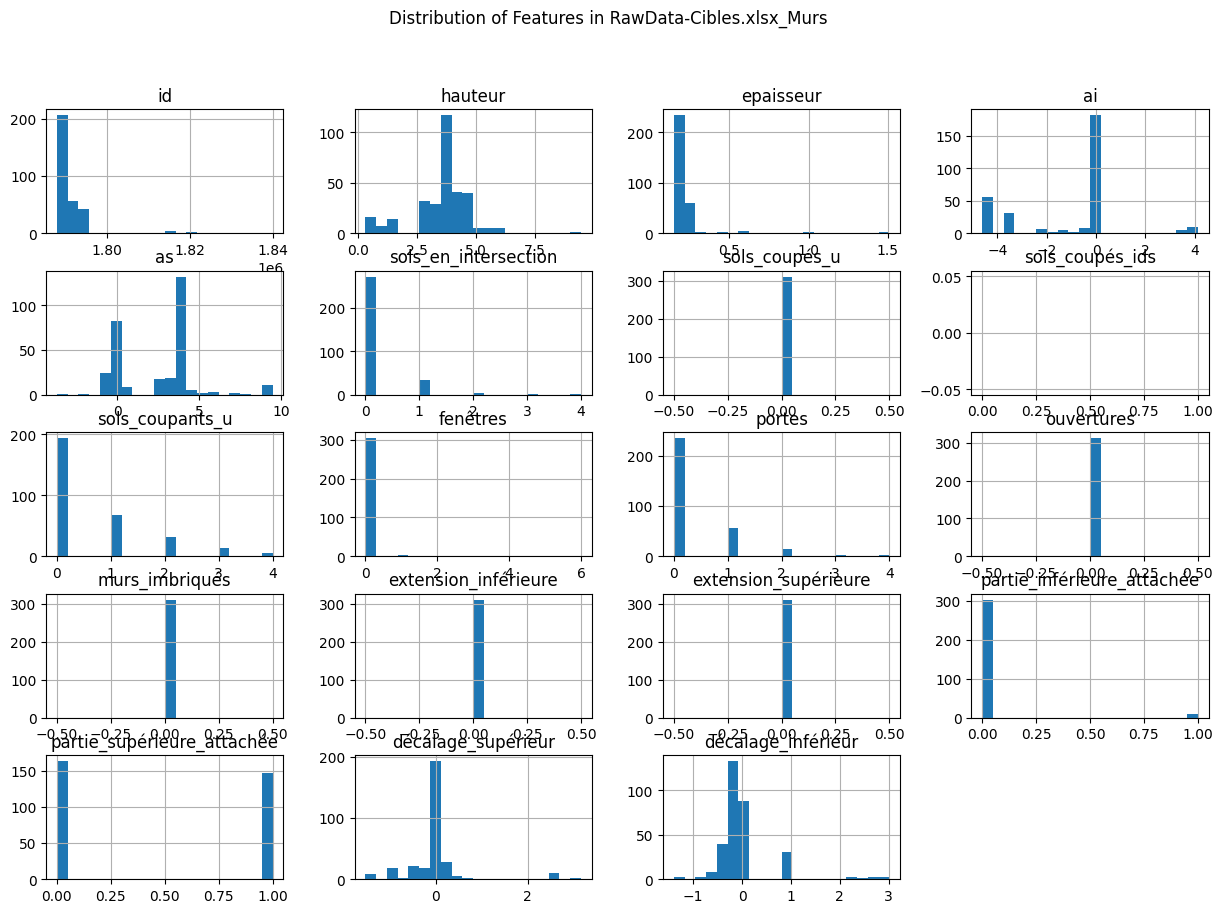

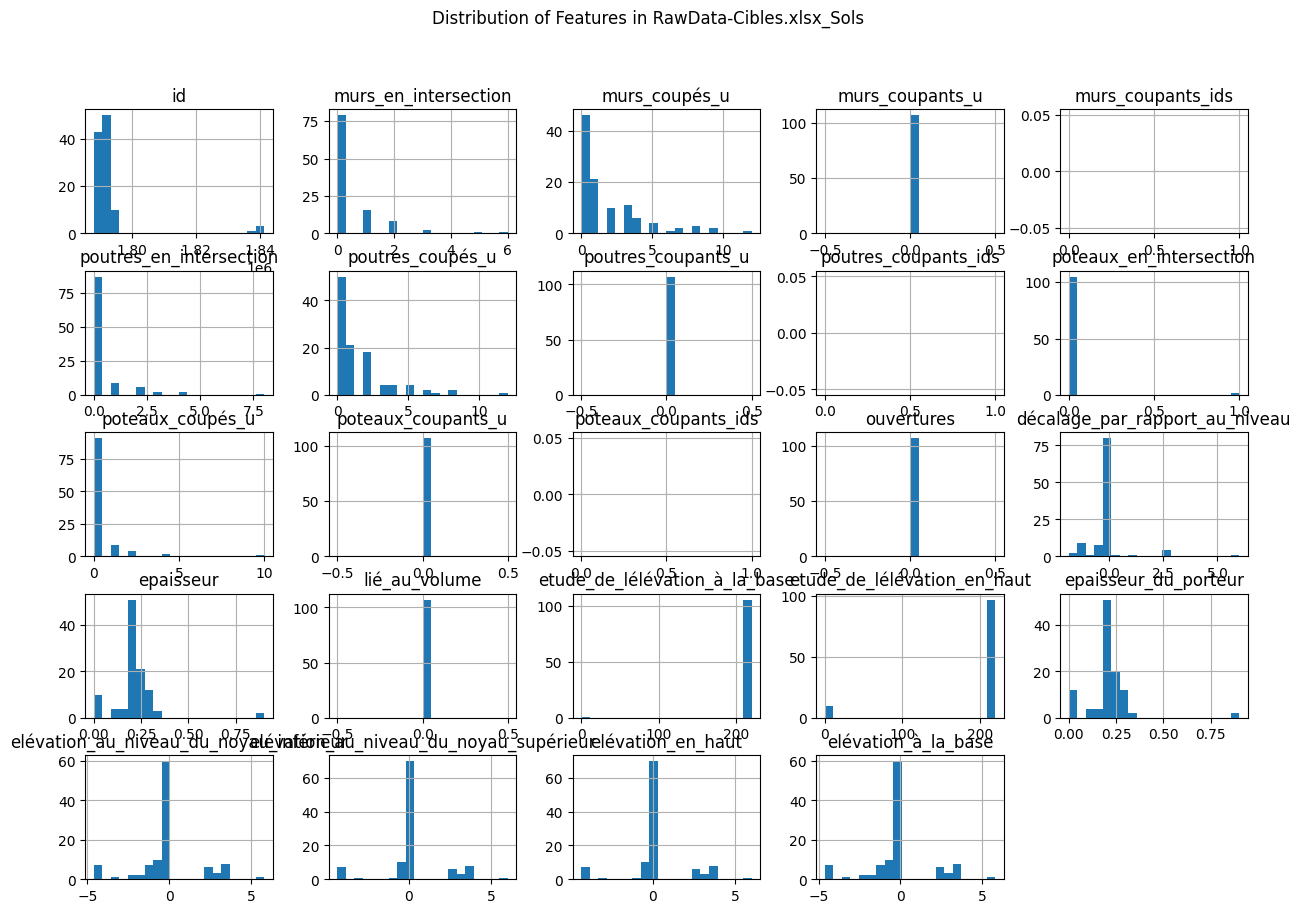

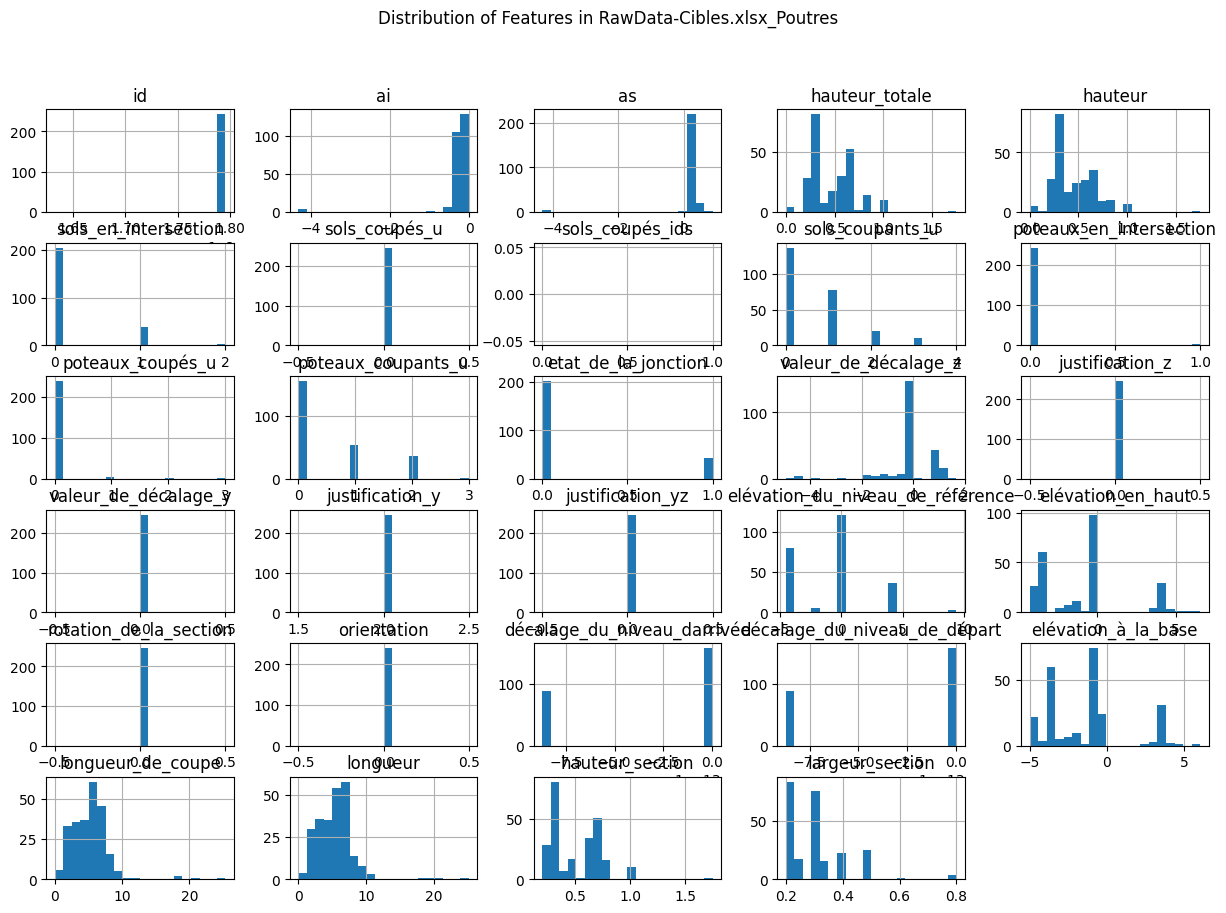

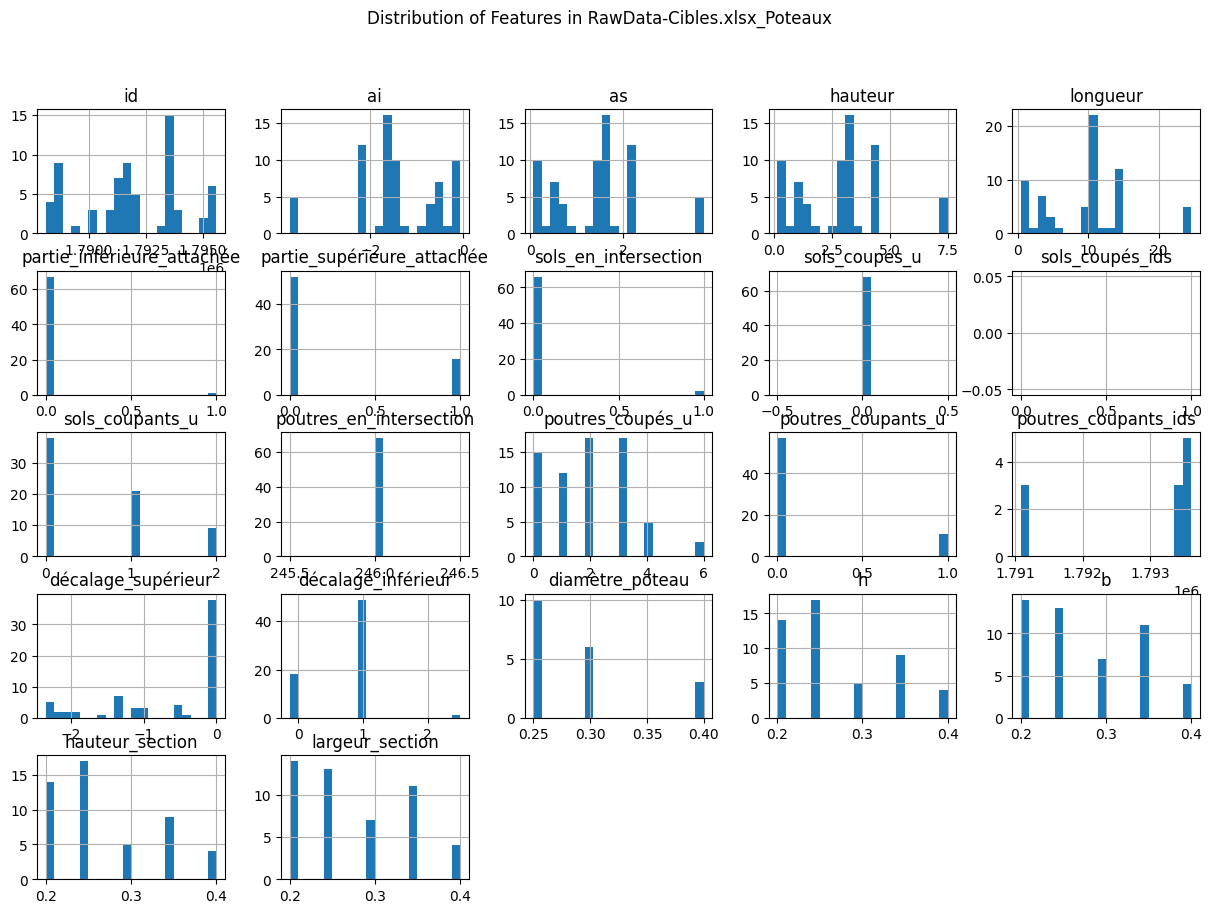

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
for df_name, df in cleaned_dataframes.items():
    df.hist(figsize=(15,10), bins=20)
    plt.suptitle(f"Distribution of Features in {df_name}")
    plt.show()

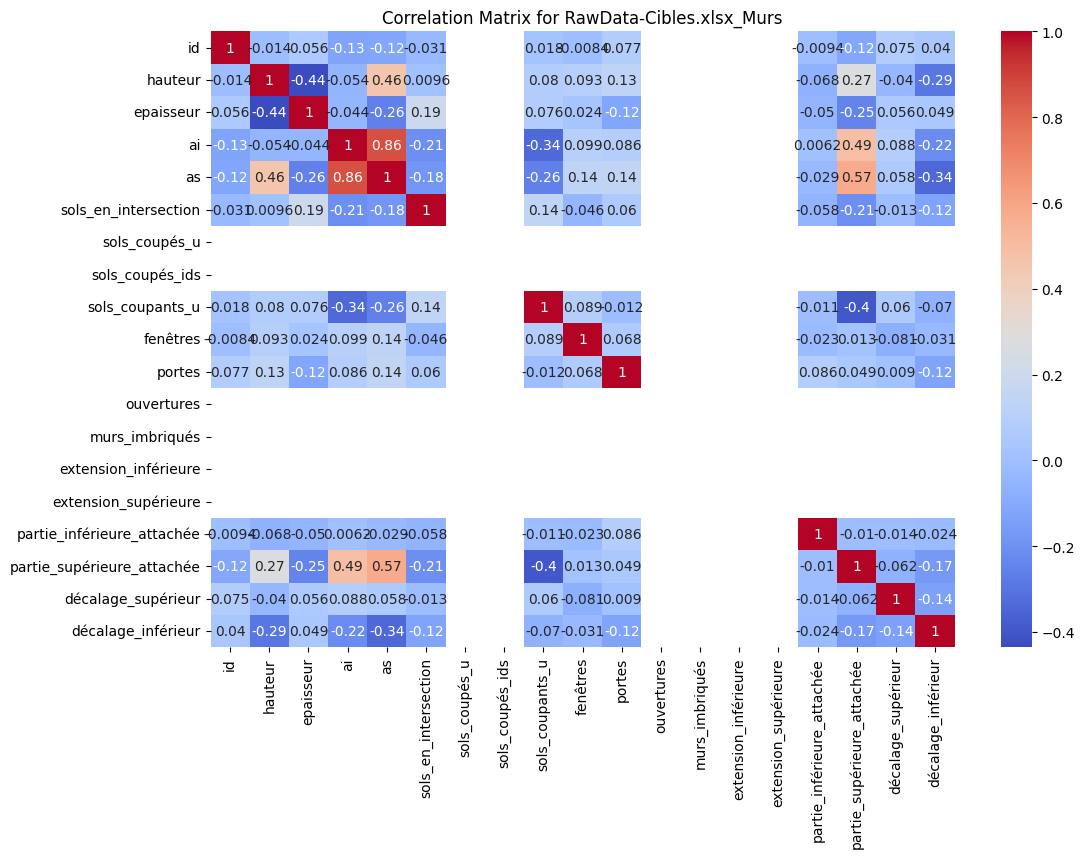

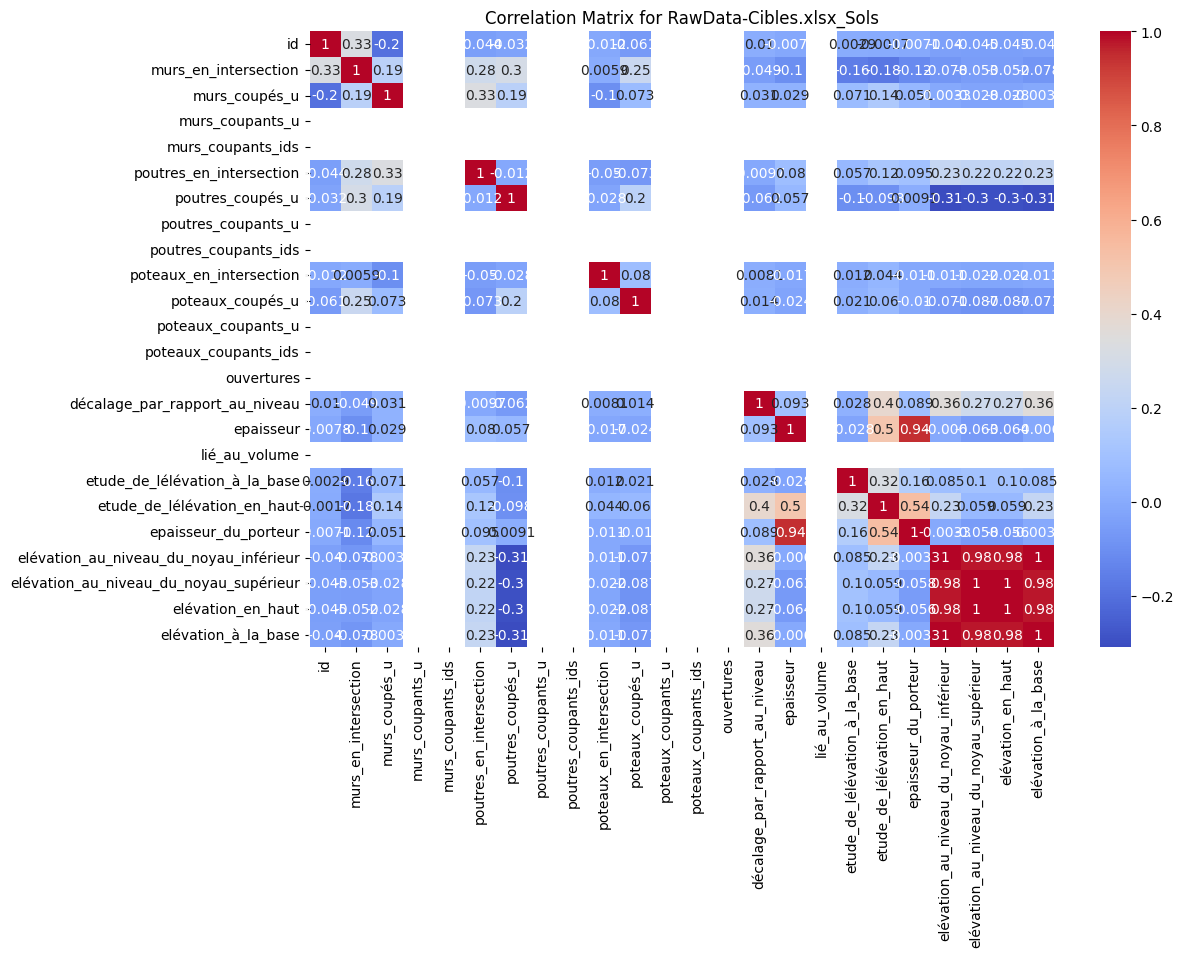

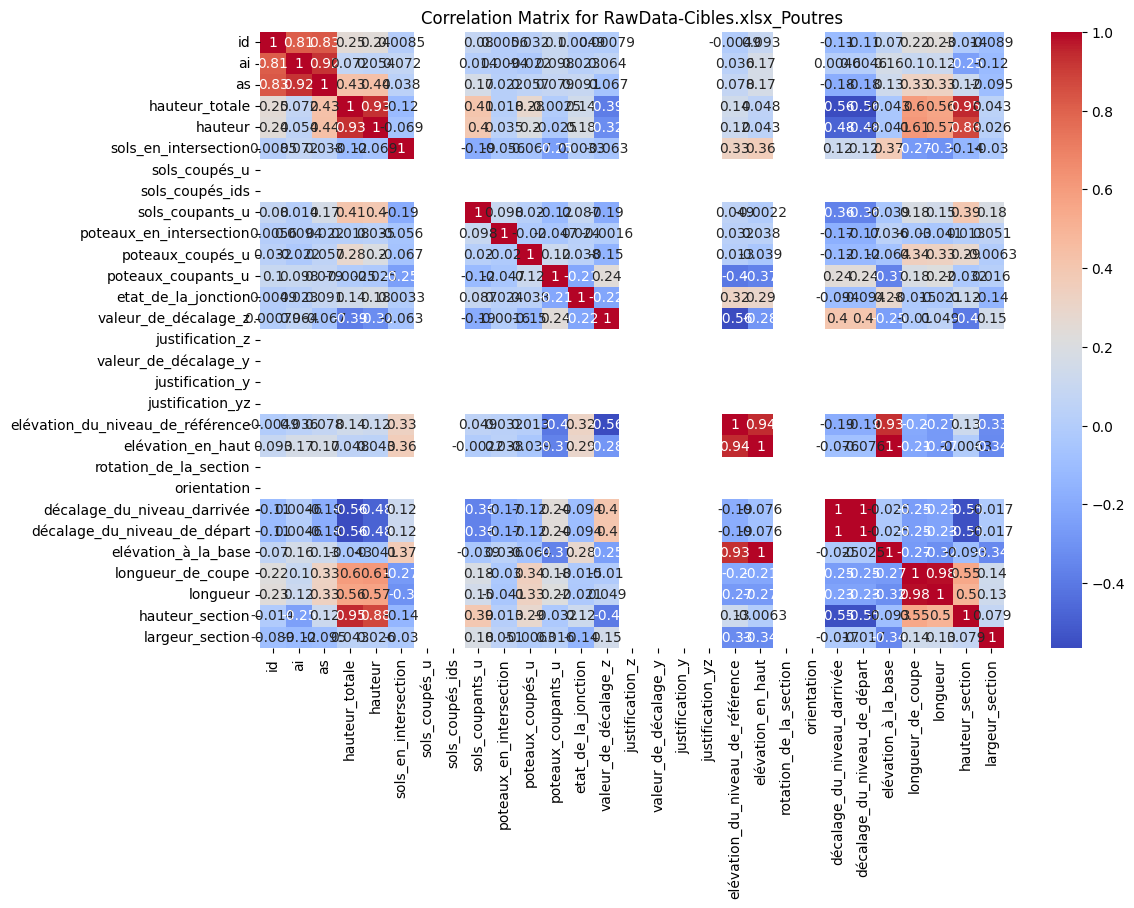

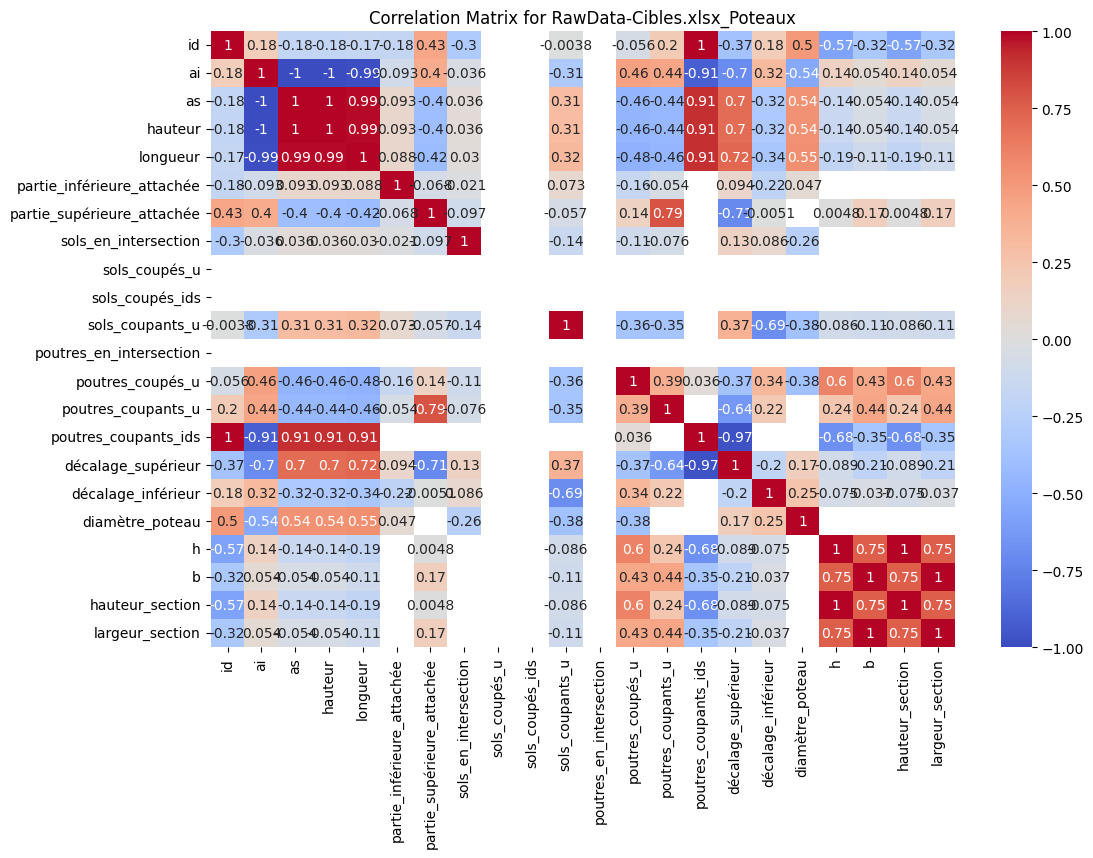

In [8]:
# Compute correlation matrices for numeric columns
for df_name, df in cleaned_dataframes.items():
    numeric_df = df.select_dtypes(include=["number"])
    correlation_matrix = numeric_df.corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title(f"Correlation Matrix for {df_name}")
    plt.show()

In [9]:
import os

# Ensure base plots directory exists
if not os.path.exists(PLOTS_DIR):
    os.makedirs(PLOTS_DIR)

# Function to generate subfolder paths for each Excel file
def get_plot_subfolder(file_name):
    subfolder_name = f"{file_name.replace('.xlsx', '').replace('.xls', '')}_Plots"
    subfolder_path = os.path.join(PLOTS_DIR, subfolder_name)

    # Create the subfolder if it doesn't exist
    if not os.path.exists(subfolder_path):
        os.makedirs(subfolder_path)

    return subfolder_path

# Save histograms
for df_name, df in cleaned_dataframes.items():
    plt.figure(figsize=(15, 10))
    df.hist(bins=20)
    plt.suptitle(f"Distribution of Features in {df_name}")

    # Extract the corresponding Excel file name
    file_name = df_name.split("_")[0]  # Extracts RawData_Cibles.xlsx from "RawData_Cibles.xlsx_Murs"
    plot_subfolder = get_plot_subfolder(file_name)

    # Define save path
    plot_path = os.path.join(plot_subfolder, f"{df_name}_histogram.png")
    plt.savefig(plot_path)
    print(f"Saved histogram in: {plot_path}")

    plt.close()

# Save correlation matrices
for df_name, df in cleaned_dataframes.items():
    numeric_df = df.select_dtypes(include=["number"])
    correlation_matrix = numeric_df.corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title(f"Correlation Matrix for {df_name}")

    # Extract Excel file name and subfolder
    file_name = df_name.split("_")[0]
    plot_subfolder = get_plot_subfolder(file_name)

    # Define save path
    plot_path = os.path.join(plot_subfolder, f"{df_name}_correlation.png")
    plt.savefig(plot_path)
    print(f"Saved correlation matrix in: {plot_path}")

    plt.close()

Saved histogram in: BIMpredict_project/plots/RawData-Cibles_Plots/RawData-Cibles.xlsx_Murs_histogram.png
Saved histogram in: BIMpredict_project/plots/RawData-Cibles_Plots/RawData-Cibles.xlsx_Sols_histogram.png
Saved histogram in: BIMpredict_project/plots/RawData-Cibles_Plots/RawData-Cibles.xlsx_Poutres_histogram.png
Saved histogram in: BIMpredict_project/plots/RawData-Cibles_Plots/RawData-Cibles.xlsx_Poteaux_histogram.png
Saved correlation matrix in: BIMpredict_project/plots/RawData-Cibles_Plots/RawData-Cibles.xlsx_Murs_correlation.png
Saved correlation matrix in: BIMpredict_project/plots/RawData-Cibles_Plots/RawData-Cibles.xlsx_Sols_correlation.png
Saved correlation matrix in: BIMpredict_project/plots/RawData-Cibles_Plots/RawData-Cibles.xlsx_Poutres_correlation.png
Saved correlation matrix in: BIMpredict_project/plots/RawData-Cibles_Plots/RawData-Cibles.xlsx_Poteaux_correlation.png


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

### Feature Selection

In [10]:
from sklearn.feature_selection import VarianceThreshold

# Function to remove low-variance features while keeping specific keywords
def remove_low_variance(df, threshold=0.01):
    selector = VarianceThreshold(threshold)
    numeric_df = df.select_dtypes(include=["number"])  # Focus only on numerical columns
    selector.fit(numeric_df)

    # Identify low-variance columns
    low_variance_cols = numeric_df.columns[~selector.get_support()]

    # Keep columns containing specific keywords
    keep_cols = [col for col in low_variance_cols if any(keyword in col.lower() for keyword in ["coupés", "coupants", "coupantés"])]

    # Columns to drop (excluding those we want to keep)
    drop_cols = [col for col in low_variance_cols if col not in keep_cols]

    # Display shape before filtering
    initial_shape = df.shape
    print(f"\n📌 Processing {df.shape[0]} rows & {df.shape[1]} columns")

    # Drop low-variance features
    df.drop(columns=drop_cols, inplace=True)

    # Display shape after filtering
    final_shape = df.shape
    print(f"⚠️ Dropped {len(drop_cols)} low-variance columns (excluding 'coupés', 'coupants', 'coupantés'): {drop_cols}")
    print(f"✅ Final shape after filtering: {final_shape}")

    return df

# Apply filtering to the fully cleaned dataset
final_cleaned_dataframes = {name: remove_low_variance(df) for name, df in final_cleaned_dataframes.items()}

print("🚀 Final variance-based feature selection completed successfully!")


📌 Processing 312 rows & 29 columns
⚠️ Dropped 4 low-variance columns (excluding 'coupés', 'coupants', 'coupantés'): ['ouvertures', 'murs_imbriqués', 'extension_inférieure', 'extension_supérieure']
✅ Final shape after filtering: (312, 25)

📌 Processing 107 rows & 31 columns
⚠️ Dropped 2 low-variance columns (excluding 'coupés', 'coupants', 'coupantés'): ['ouvertures', 'lié_au_volume']
✅ Final shape after filtering: (107, 29)

📌 Processing 246 rows & 38 columns
⚠️ Dropped 8 low-variance columns (excluding 'coupés', 'coupants', 'coupantés'): ['justification_z', 'valeur_de_décalage_y', 'justification_y', 'justification_yz', 'rotation_de_la_section', 'orientation', 'décalage_du_niveau_darrivée', 'décalage_du_niveau_de_départ']
✅ Final shape after filtering: (246, 30)

📌 Processing 68 rows & 28 columns
⚠️ Dropped 6 low-variance columns (excluding 'coupés', 'coupants', 'coupantés'): ['poutres_en_intersection', 'diamètre_poteau', 'h', 'b', 'hauteur_section', 'largeur_section']
✅ Final shape a

In [11]:
# Function to remove highly correlated features and display shape changes
def remove_highly_correlated(df, threshold=0.98):
    numeric_df = df.select_dtypes(include=["number"])
    correlation_matrix = numeric_df.corr().abs()

    # Identify highly correlated features
    upper_triangle = correlation_matrix.where(correlation_matrix > threshold).stack().reset_index()
    correlated_features = set(upper_triangle["level_0"])

    # Display shape before
    initial_shape = df.shape
    print(f"\n📌 Processing {df.shape[0]} rows & {df.shape[1]} columns")

    # Drop highly correlated features
    df.drop(columns=correlated_features, inplace=True)

    # Display shape after
    final_shape = df.shape
    print(f"⚠️ Dropped {len(correlated_features)} highly correlated columns: {list(correlated_features)}")
    print(f"✅ Final shape after filtering: {final_shape}")

    return df

# Apply to fully cleaned dataset
final_cleaned_dataframes = {name: remove_highly_correlated(df) for name, df in final_cleaned_dataframes.items()}

print("🚀 Final correlation-based feature selection completed successfully!")


📌 Processing 312 rows & 25 columns
⚠️ Dropped 13 highly correlated columns: ['partie_supérieure_attachée', 'sols_coupants_u', 'epaisseur', 'partie_inférieure_attachée', 'décalage_supérieur', 'décalage_inférieur', 'portes', 'sols_en_intersection', 'hauteur', 'as', 'id', 'ai', 'fenêtres']
✅ Final shape after filtering: (312, 12)

📌 Processing 107 rows & 29 columns
⚠️ Dropped 16 highly correlated columns: ['etude_de_lélévation_en_haut', 'elévation_au_niveau_du_noyau_supérieur', 'epaisseur', 'elévation_en_haut', 'poteaux_en_intersection', 'etude_de_lélévation_à_la_base', 'poteaux_coupés_u', 'elévation_au_niveau_du_noyau_inférieur', 'poutres_coupés_u', 'poutres_en_intersection', 'epaisseur_du_porteur', 'id', 'elévation_à_la_base', 'décalage_par_rapport_au_niveau', 'murs_coupés_u', 'murs_en_intersection']
✅ Final shape after filtering: (107, 13)

📌 Processing 246 rows & 30 columns
⚠️ Dropped 19 highly correlated columns: ['poteaux_en_intersection', 'largeur_section', 'id', 'hauteur_totale',

In [12]:
# %pip install ipywidgets

In [13]:
import os

# Function to generate subfolder paths for storing SHAP plots
def get_plot_subfolder(file_name):
    subfolder_name = f"{file_name}_Plots"
    subfolder_path = os.path.join(PLOTS_DIR, subfolder_name)

    # Create the subfolder if it doesn't exist
    if not os.path.exists(subfolder_path):
        os.makedirs(subfolder_path)

    return subfolder_path

# ✅ Ensure SHAP is applied to the fully processed dataset
final_shap_dataframes = final_cleaned_dataframes  # Use the cleaned dataset after variance/correlation removal

print("🚀 SHAP analysis will now use the final processed data!")

for target_column in TARGET_COLUMNS:
    for df_name, df in final_cleaned_dataframes.items():  # Use the final processed dataset
        if target_column in df.columns:
            unique_values = df[target_column].nunique()
            print(f"{target_column} in {df_name} has {unique_values} unique values.")

🚀 SHAP analysis will now use the final processed data!
011ec_lot in RawData-Cibles.xlsx_Murs has 1 unique values.
011ec_lot in RawData-Cibles.xlsx_Sols has 1 unique values.
011ec_lot in RawData-Cibles.xlsx_Poutres has 1 unique values.
011ec_lot in RawData-Cibles.xlsx_Poteaux has 1 unique values.
012ec_ouvrage in RawData-Cibles.xlsx_Murs has 7 unique values.
012ec_ouvrage in RawData-Cibles.xlsx_Sols has 5 unique values.
012ec_ouvrage in RawData-Cibles.xlsx_Poutres has 4 unique values.
012ec_ouvrage in RawData-Cibles.xlsx_Poteaux has 3 unique values.
013ec_localisation in RawData-Cibles.xlsx_Murs has 6 unique values.
013ec_localisation in RawData-Cibles.xlsx_Sols has 4 unique values.
013ec_localisation in RawData-Cibles.xlsx_Poutres has 6 unique values.
013ec_localisation in RawData-Cibles.xlsx_Poteaux has 3 unique values.
014ec_mode_constructif in RawData-Cibles.xlsx_Murs has 5 unique values.
014ec_mode_constructif in RawData-Cibles.xlsx_Sols has 1 unique values.
014ec_mode_constructif 


Processing SHAP for RawData-Cibles.xlsx_Murs...
🎯 Target columns found in RawData-Cibles.xlsx_Murs: ['012ec_ouvrage', '013ec_localisation', '014ec_mode_constructif']
🔍 Analyzing SHAP for target: 012ec_ouvrage
📌 Initial shape before SHAP processing: (312, 12)
📊 SHAP values shape: 312, Feature matrix shape: (312, 9)


<Figure size 640x480 with 0 Axes>

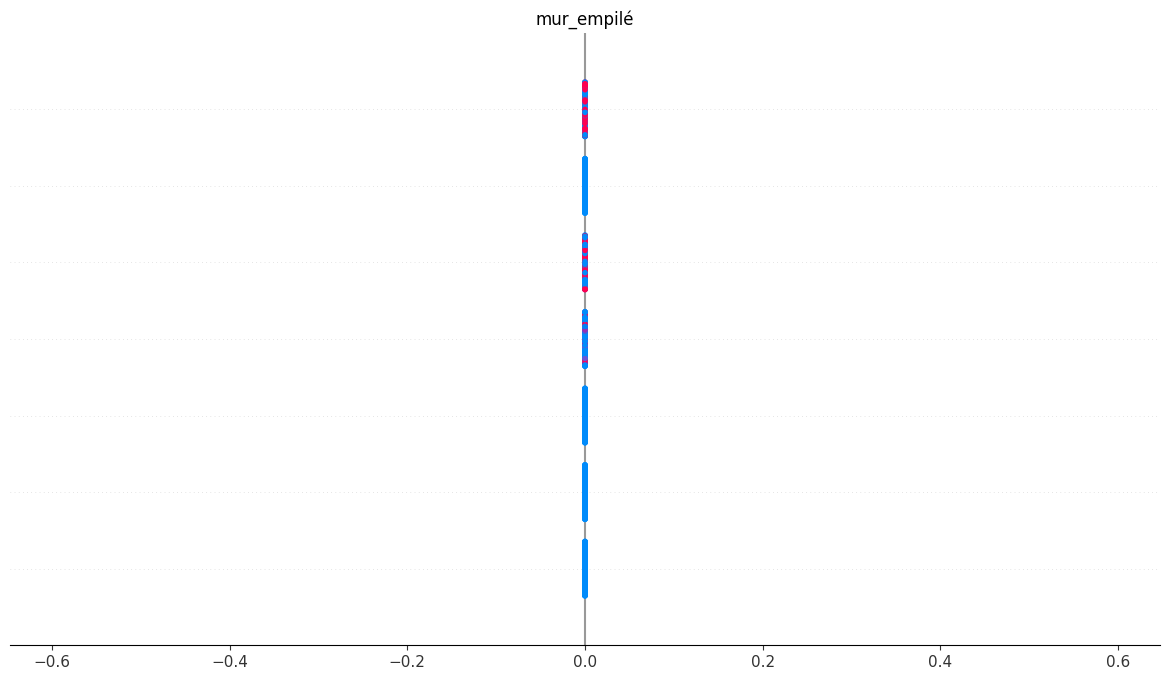

✅ Saved SHAP plot for 012ec_ouvrage in: plots/SHAP_RawData-Cibles.xlsx_Murs_Plots/012ec_ouvrage_SHAP.png
📌 Final shape after SHAP processing: (312, 9)
🔍 Analyzing SHAP for target: 013ec_localisation
📌 Initial shape before SHAP processing: (312, 12)
📊 SHAP values shape: 312, Feature matrix shape: (312, 9)


<Figure size 640x480 with 0 Axes>

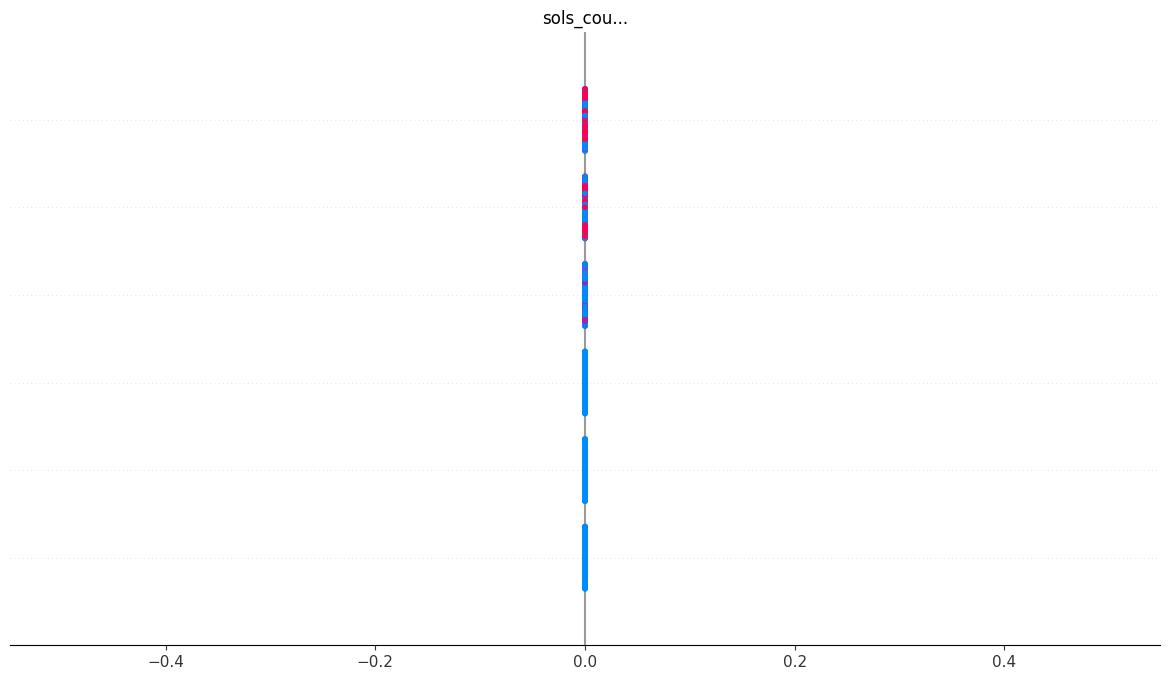

✅ Saved SHAP plot for 013ec_localisation in: plots/SHAP_RawData-Cibles.xlsx_Murs_Plots/013ec_localisation_SHAP.png
📌 Final shape after SHAP processing: (312, 9)
🔍 Analyzing SHAP for target: 014ec_mode_constructif
📌 Initial shape before SHAP processing: (312, 12)
📊 SHAP values shape: 312, Feature matrix shape: (312, 9)


<Figure size 640x480 with 0 Axes>

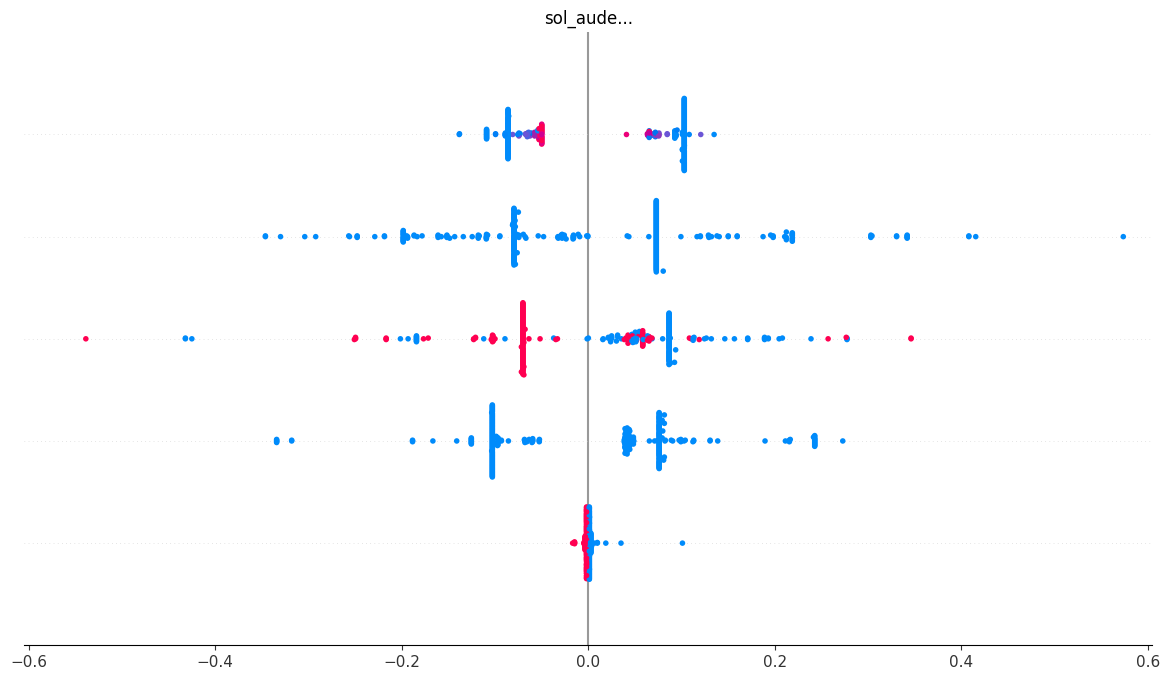

✅ Saved SHAP plot for 014ec_mode_constructif in: plots/SHAP_RawData-Cibles.xlsx_Murs_Plots/014ec_mode_constructif_SHAP.png
📌 Final shape after SHAP processing: (312, 9)

Processing SHAP for RawData-Cibles.xlsx_Sols...
🎯 Target columns found in RawData-Cibles.xlsx_Sols: ['012ec_ouvrage', '013ec_localisation']
🔍 Analyzing SHAP for target: 012ec_ouvrage
📌 Initial shape before SHAP processing: (107, 13)
📊 SHAP values shape: 107, Feature matrix shape: (107, 11)


<Figure size 640x480 with 0 Axes>

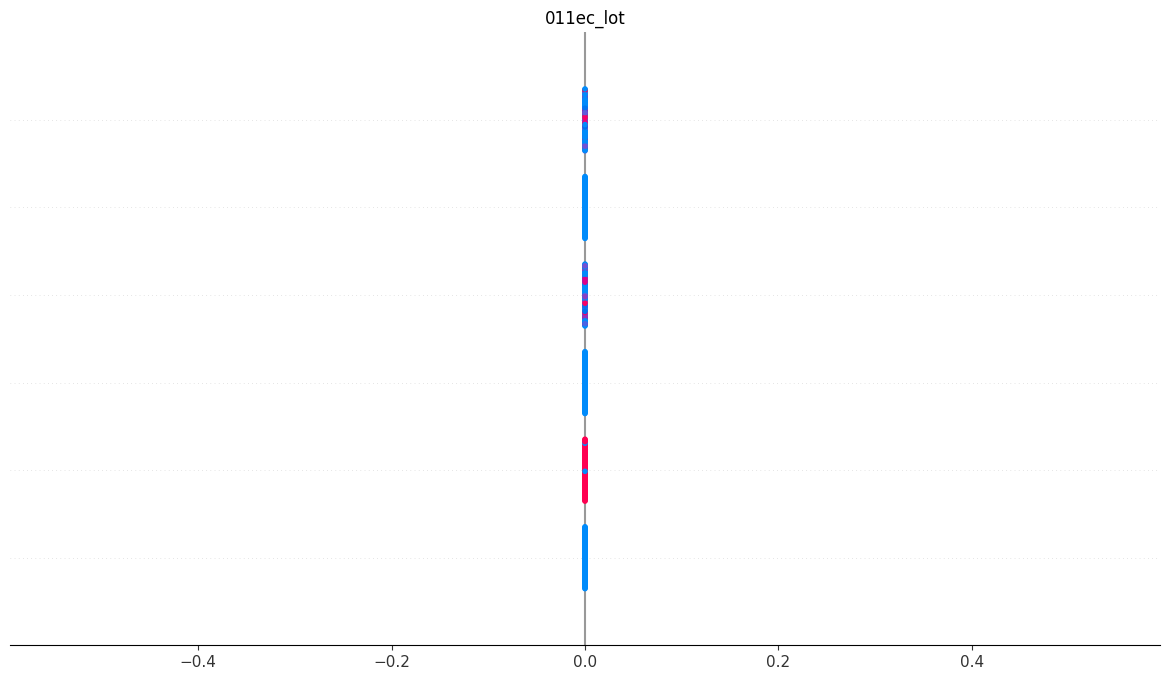

✅ Saved SHAP plot for 012ec_ouvrage in: plots/SHAP_RawData-Cibles.xlsx_Sols_Plots/012ec_ouvrage_SHAP.png
📌 Final shape after SHAP processing: (107, 11)
🔍 Analyzing SHAP for target: 013ec_localisation
📌 Initial shape before SHAP processing: (107, 13)
📊 SHAP values shape: 107, Feature matrix shape: (107, 11)


<Figure size 640x480 with 0 Axes>

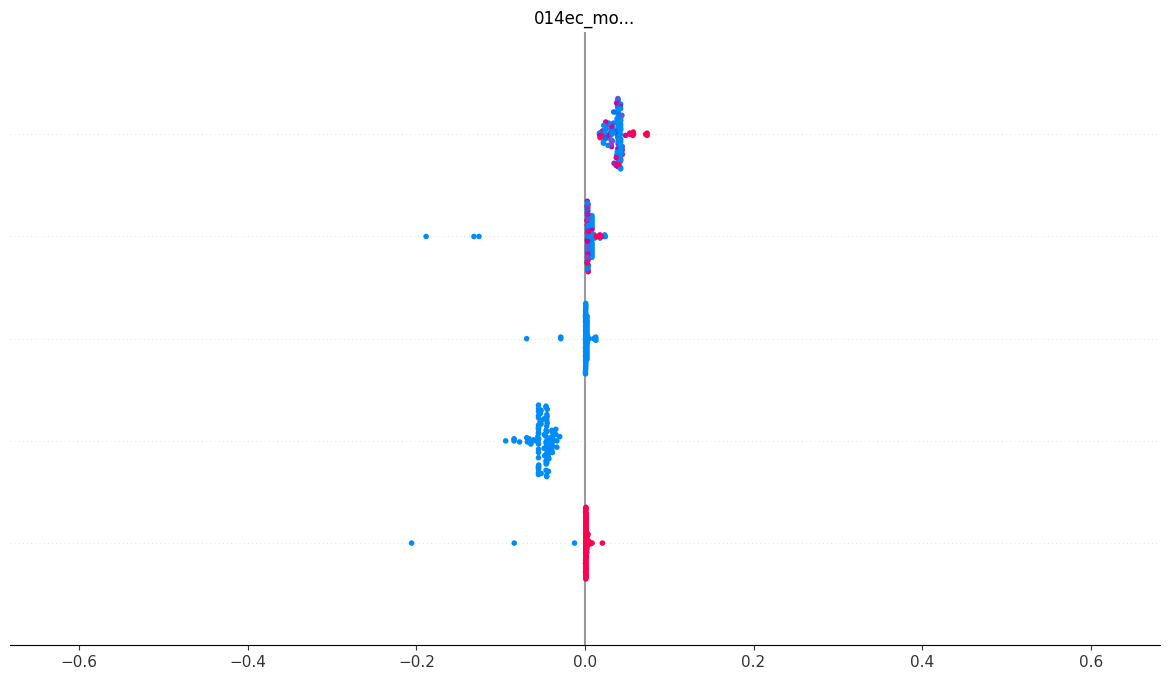

✅ Saved SHAP plot for 013ec_localisation in: plots/SHAP_RawData-Cibles.xlsx_Sols_Plots/013ec_localisation_SHAP.png
📌 Final shape after SHAP processing: (107, 11)

Processing SHAP for RawData-Cibles.xlsx_Poutres...
🎯 Target columns found in RawData-Cibles.xlsx_Poutres: ['012ec_ouvrage', '013ec_localisation', '014ec_mode_constructif']
🔍 Analyzing SHAP for target: 012ec_ouvrage
📌 Initial shape before SHAP processing: (246, 11)
📊 SHAP values shape: 246, Feature matrix shape: (246, 8)


<Figure size 640x480 with 0 Axes>

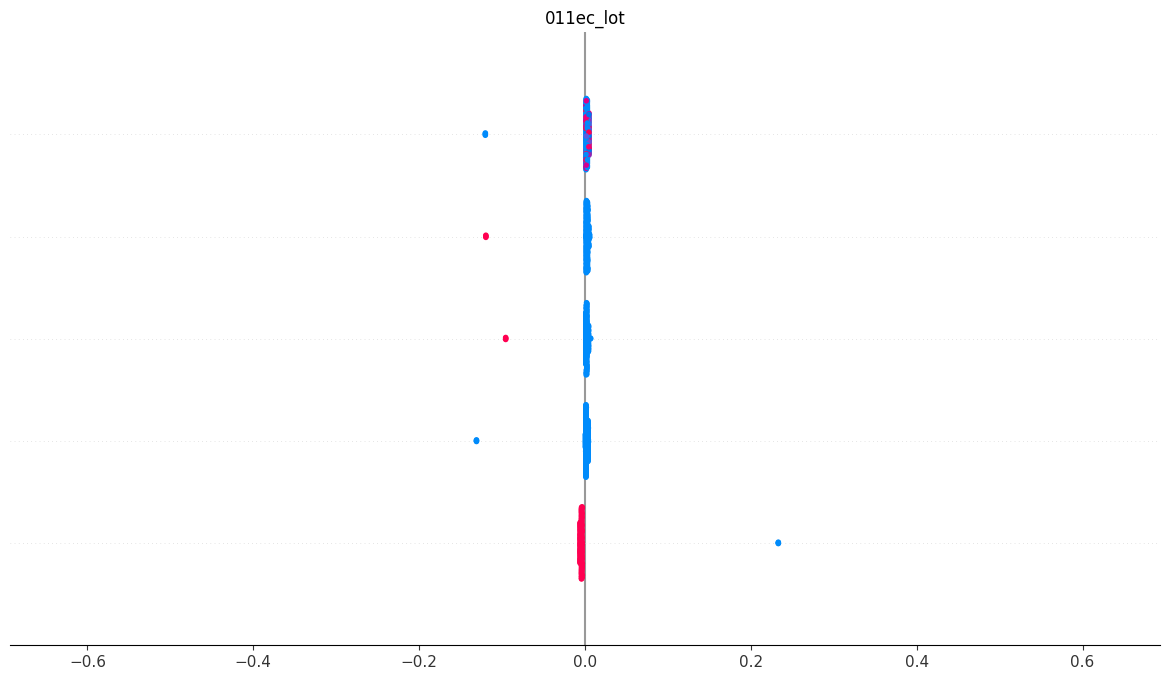

✅ Saved SHAP plot for 012ec_ouvrage in: plots/SHAP_RawData-Cibles.xlsx_Poutres_Plots/012ec_ouvrage_SHAP.png
📌 Final shape after SHAP processing: (246, 8)
🔍 Analyzing SHAP for target: 013ec_localisation
📌 Initial shape before SHAP processing: (246, 11)
📊 SHAP values shape: 246, Feature matrix shape: (246, 8)


<Figure size 640x480 with 0 Axes>

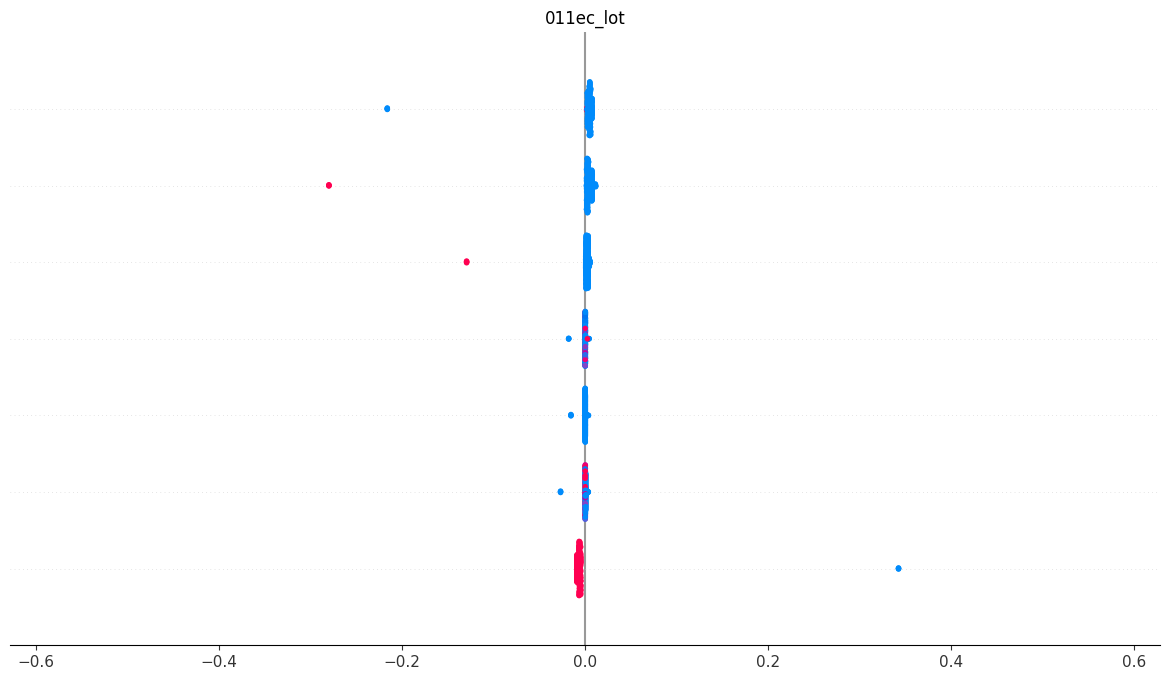

✅ Saved SHAP plot for 013ec_localisation in: plots/SHAP_RawData-Cibles.xlsx_Poutres_Plots/013ec_localisation_SHAP.png
📌 Final shape after SHAP processing: (246, 8)
🔍 Analyzing SHAP for target: 014ec_mode_constructif
📌 Initial shape before SHAP processing: (246, 11)
📊 SHAP values shape: 246, Feature matrix shape: (246, 8)


<Figure size 640x480 with 0 Axes>

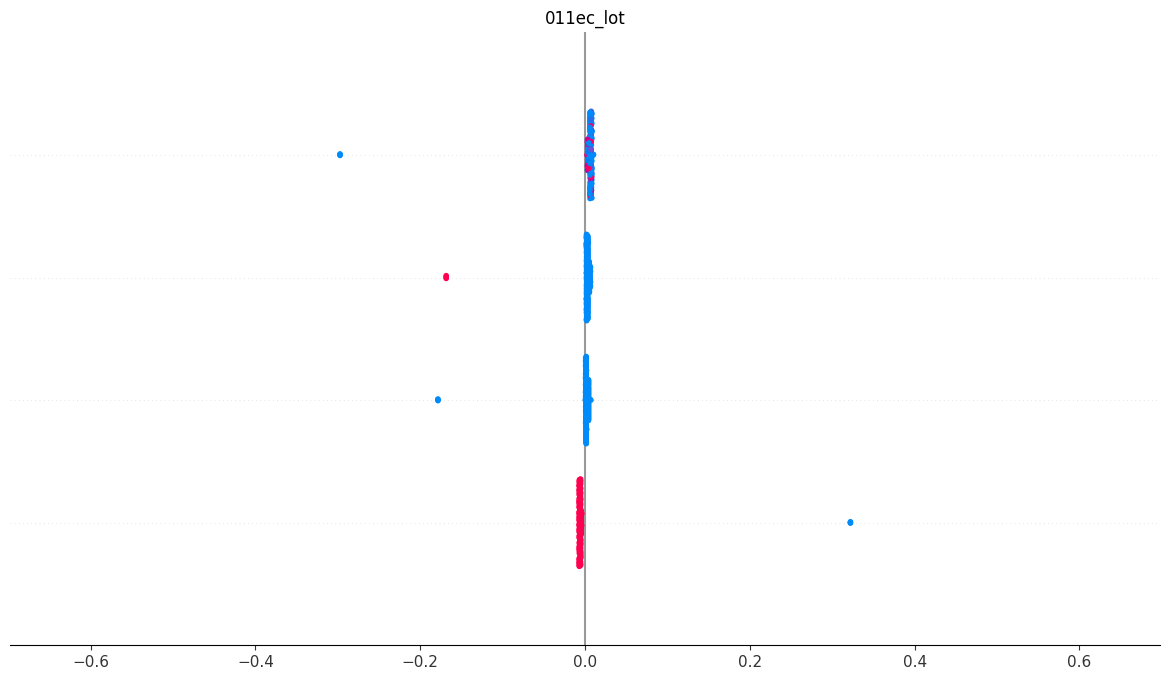

✅ Saved SHAP plot for 014ec_mode_constructif in: plots/SHAP_RawData-Cibles.xlsx_Poutres_Plots/014ec_mode_constructif_SHAP.png
📌 Final shape after SHAP processing: (246, 8)

Processing SHAP for RawData-Cibles.xlsx_Poteaux...
🎯 Target columns found in RawData-Cibles.xlsx_Poteaux: ['012ec_ouvrage', '013ec_localisation', '014ec_mode_constructif']
🔍 Analyzing SHAP for target: 012ec_ouvrage
📌 Initial shape before SHAP processing: (68, 8)
📊 SHAP values shape: 68, Feature matrix shape: (68, 5)


<Figure size 640x480 with 0 Axes>

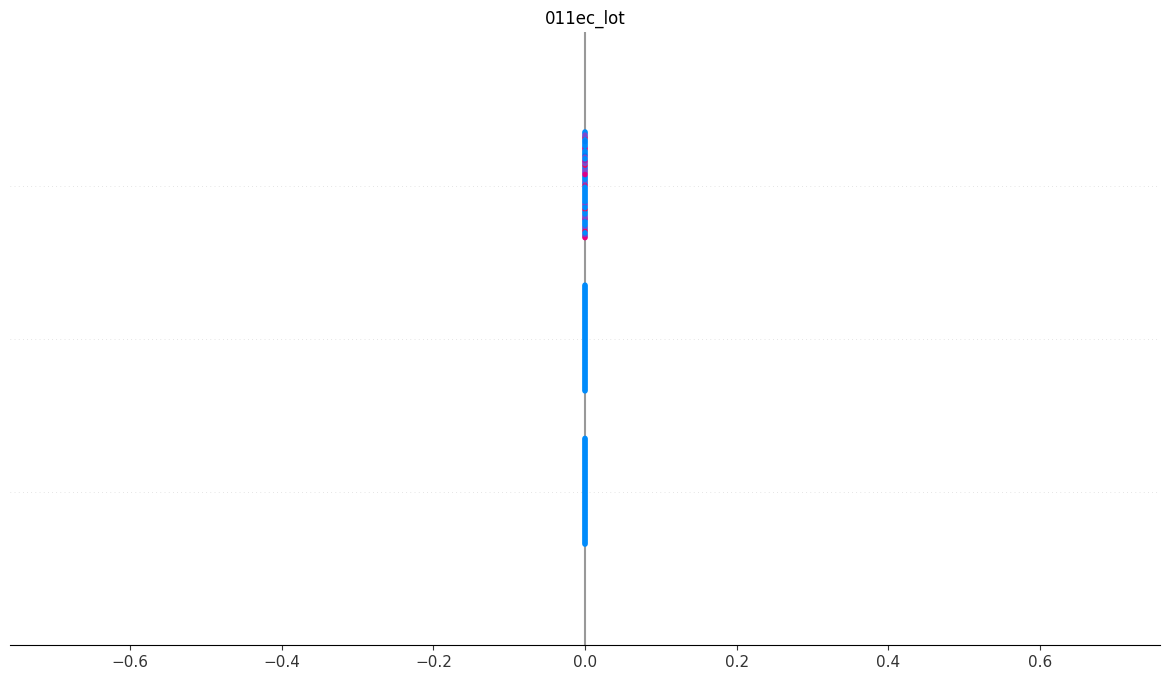

✅ Saved SHAP plot for 012ec_ouvrage in: plots/SHAP_RawData-Cibles.xlsx_Poteaux_Plots/012ec_ouvrage_SHAP.png
📌 Final shape after SHAP processing: (68, 5)
🔍 Analyzing SHAP for target: 013ec_localisation
📌 Initial shape before SHAP processing: (68, 8)
📊 SHAP values shape: 68, Feature matrix shape: (68, 5)


<Figure size 640x480 with 0 Axes>

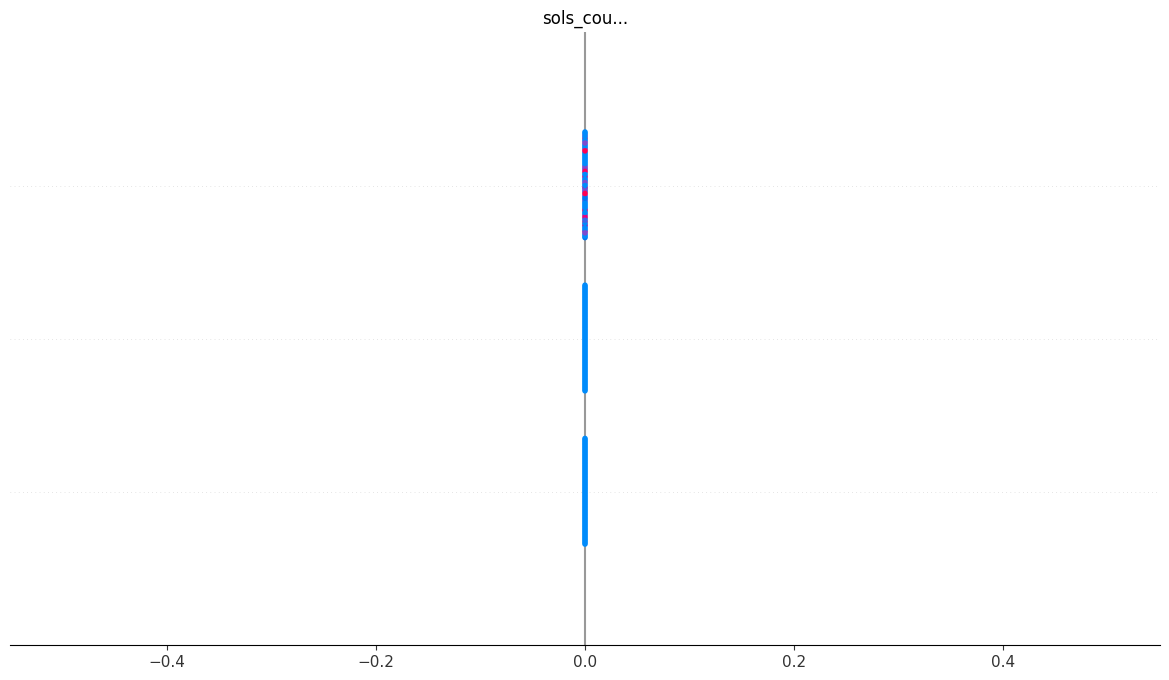

✅ Saved SHAP plot for 013ec_localisation in: plots/SHAP_RawData-Cibles.xlsx_Poteaux_Plots/013ec_localisation_SHAP.png
📌 Final shape after SHAP processing: (68, 5)
🔍 Analyzing SHAP for target: 014ec_mode_constructif
📌 Initial shape before SHAP processing: (68, 8)
📊 SHAP values shape: 68, Feature matrix shape: (68, 5)


<Figure size 640x480 with 0 Axes>

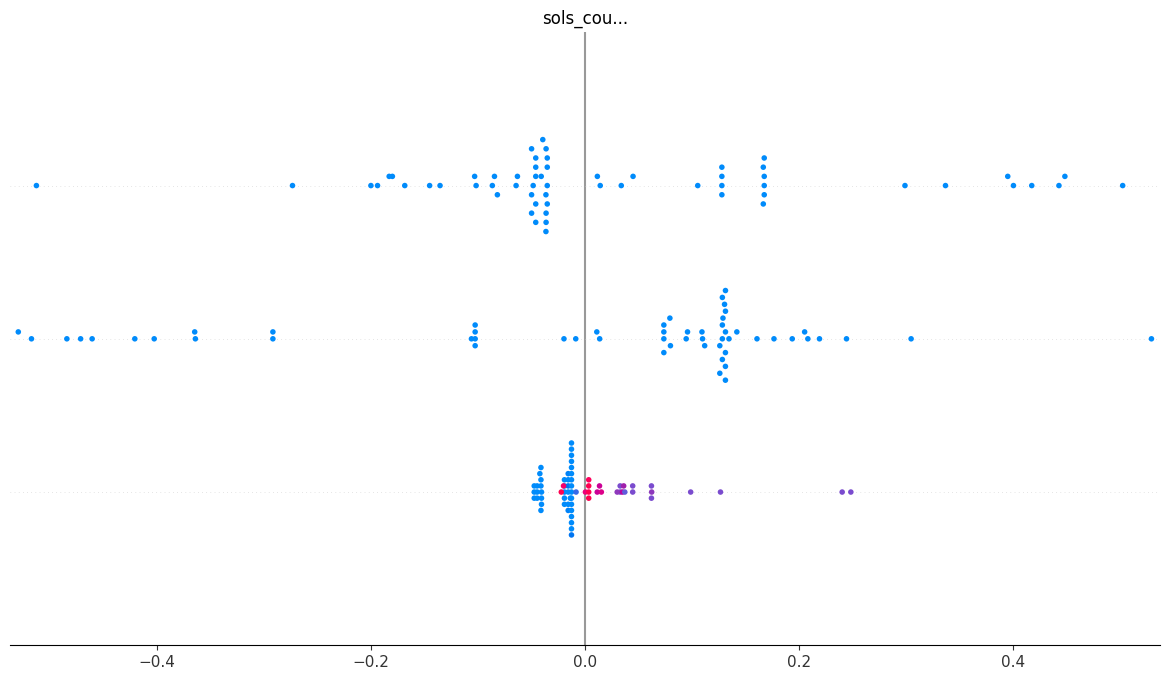

✅ Saved SHAP plot for 014ec_mode_constructif in: plots/SHAP_RawData-Cibles.xlsx_Poteaux_Plots/014ec_mode_constructif_SHAP.png
📌 Final shape after SHAP processing: (68, 5)


In [14]:
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import os

# Ensure SHAP initializes properly
shap.initjs()

# Function to create subfolder for SHAP plots
def get_plot_subfolder(file_name):
    subfolder_name = f"{file_name}_Plots"
    subfolder_path = os.path.join("plots", subfolder_name)  # Adjust path as needed

    # Create subfolder if it doesn’t exist
    if not os.path.exists(subfolder_path):
        os.makedirs(subfolder_path)

    return subfolder_path

# Loop through all fully processed dataframes
for df_name, df in final_cleaned_dataframes.items():  # ✅ Use fully processed dataset
    print(f"\nProcessing SHAP for {df_name}...")

    # Identify available target columns in the current dataframe
    existing_target_columns = [col for col in TARGET_COLUMNS if col in df.columns and df[col].nunique() > 1]

    if existing_target_columns:
        print(f"🎯 Target columns found in {df_name}: {existing_target_columns}")

        for target_column in existing_target_columns:
            print(f"🔍 Analyzing SHAP for target: {target_column}")

            # Display shape before training
            initial_shape = df.shape
            print(f"📌 Initial shape before SHAP processing: {initial_shape}")

            # Prepare the data
            X = df.drop(columns=existing_target_columns)  # Exclude target columns from features

            # Convert categorical columns in X to numeric
            for col in X.select_dtypes(include=["object"]).columns:
                X[col] = X[col].astype("category").cat.codes

            # Convert target column to numeric
            y = df[target_column].astype("category").cat.codes

            # Train RandomForestClassifier
            model = RandomForestClassifier()
            model.fit(X, y)

            # Compute SHAP values
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X)

            # Verify SHAP output shape before plotting
            print(f"📊 SHAP values shape: {len(shap_values)}, Feature matrix shape: {X.shape}")
            if isinstance(shap_values, list):
                shap_values = shap_values[0]  # Use first class for visualization in multi-class models

            # Create subfolder for SHAP plots
            plot_subfolder = get_plot_subfolder(f"SHAP_{df_name}")
            plot_path = os.path.join(plot_subfolder, f"{target_column}_SHAP.png")

            # Display & save SHAP summary plot
            shap.summary_plot(shap_values, X, show=False)
            plt.savefig(plot_path)
            plt.show()

            print(f"✅ Saved SHAP plot for {target_column} in: {plot_path}")

            # Display shape after SHAP analysis
            final_shape = X.shape
            print(f"📌 Final shape after SHAP processing: {final_shape}")

    else:
        print(f"⚠️ No valid target columns found in {df_name}. Skipping...")

## Training and testing 

Where to Go from Here?
🔹 Feature engineering: If accuracy is low, refine features further
🔹 Hyperparameter tuning: Optimize n_estimators, max_depth, etc.
🔹 Compare multiple models: Try XGBoost or SVM for better performance

Your Next Step
Run the model training and evaluation, then let me know if you'd like tuning suggestions or deeper insights! 🚀🔥
This is getting exciting—you're building something powerful! 💡


In [15]:
# Iterate over each dataframe in the dictionary and print its dtypes
for df_name, df in final_cleaned_dataframes.items():
	print(f"Dtypes for {df_name}:")
	print(df.dtypes)
	print("\n")

Dtypes for RawData-Cibles.xlsx_Murs:
011ec_lot                 object
012ec_ouvrage             object
013ec_localisation        object
014ec_mode_constructif    object
sols_coupés_u              int64
sols_coupants_ids         object
sol_audessus                bool
sol_endessous               bool
mur_multicouche             bool
mur_empilé                  bool
profil_modifié              bool
matériau_structurel       object
dtype: object


Dtypes for RawData-Cibles.xlsx_Sols:
011ec_lot                 object
012ec_ouvrage             object
013ec_localisation        object
014ec_mode_constructif    object
murs_coupés_ids           object
murs_coupants_u            int64
poutres_coupés_ids        object
poutres_coupants_u         int64
poteaux_coupés_ids        object
poteaux_coupants_u         int64
sol_multicouche             bool
profil_modifié              bool
matériau_structurel       object
dtype: object


Dtypes for RawData-Cibles.xlsx_Poutres:
011ec_lot                 obj

In [16]:
# Function to convert ID strings into a numeric count feature
def count_ids(id_string):
    """Convert string of IDs into a numeric count."""
    if isinstance(id_string, str):
        return len(id_string.split(","))  # Count the number of IDs
    return 0  # Return 0 if no valid IDs exist

# Apply processing to fully cleaned datasets
for df_name, df in final_cleaned_dataframes.items():  # ✅ Use final processed dataset
    print(f"\n🔄 Processing ID count transformation for {df_name}...")

    # Identify relevant ID columns
    id_columns = [col for col in df.columns if "coupants_(ids)" in col or "coupés_(ids)" in col]

    # Display shape before processing
    initial_shape = df.shape
    print(f"📌 Initial shape before ID count processing: {initial_shape}")

    # Transform ID columns into numeric count and drop originals
    for col in id_columns:
        df[f"{col}_count"] = df[col].apply(count_ids)
        df.drop(columns=[col], inplace=True)  # Remove original text-based ID columns

    # Ensure all remaining data is numeric
    df = df.apply(pd.to_numeric, errors="coerce").fillna(0)

    # Store the updated dataframe
    final_cleaned_dataframes[df_name] = df

    # Display shape after processing
    final_shape = df.shape
    print(f"✅ Final shape after ID count transformation: {final_shape}")


🔄 Processing ID count transformation for RawData-Cibles.xlsx_Murs...
📌 Initial shape before ID count processing: (312, 12)
✅ Final shape after ID count transformation: (312, 12)

🔄 Processing ID count transformation for RawData-Cibles.xlsx_Sols...
📌 Initial shape before ID count processing: (107, 13)
✅ Final shape after ID count transformation: (107, 13)

🔄 Processing ID count transformation for RawData-Cibles.xlsx_Poutres...
📌 Initial shape before ID count processing: (246, 11)
✅ Final shape after ID count transformation: (246, 11)

🔄 Processing ID count transformation for RawData-Cibles.xlsx_Poteaux...
📌 Initial shape before ID count processing: (68, 8)
✅ Final shape after ID count transformation: (68, 8)


In [17]:
# Ensure missing values are filled in the processed datasets
for df_name, df in final_cleaned_dataframes.items():
    print(f"\n🟢 Filling missing values for {df_name}...")

    # Display shape before filling missing values
    initial_shape = df.shape
    print(f"📌 Initial shape before filling NaN: {initial_shape}")

    # Fill missing values with 0
    df.fillna(0, inplace=True)

    # Store updated dataframe back
    final_cleaned_dataframes[df_name] = df

    # Display shape after processing
    final_shape = df.shape
    print(f"✅ Final shape after filling NaN: {final_shape}")

print("🚀 Missing values successfully handled across all datasets!")


🟢 Filling missing values for RawData-Cibles.xlsx_Murs...
📌 Initial shape before filling NaN: (312, 12)
✅ Final shape after filling NaN: (312, 12)

🟢 Filling missing values for RawData-Cibles.xlsx_Sols...
📌 Initial shape before filling NaN: (107, 13)
✅ Final shape after filling NaN: (107, 13)

🟢 Filling missing values for RawData-Cibles.xlsx_Poutres...
📌 Initial shape before filling NaN: (246, 11)
✅ Final shape after filling NaN: (246, 11)

🟢 Filling missing values for RawData-Cibles.xlsx_Poteaux...
📌 Initial shape before filling NaN: (68, 8)
✅ Final shape after filling NaN: (68, 8)
🚀 Missing values successfully handled across all datasets!


In [18]:
for df_name, df in final_cleaned_dataframes.items():
    categorical_cols = df.select_dtypes(include=["object"]).columns
    print(f"\n📌 {df_name} - Categorical Columns Before Encoding: {categorical_cols.tolist()}")


📌 RawData-Cibles.xlsx_Murs - Categorical Columns Before Encoding: []

📌 RawData-Cibles.xlsx_Sols - Categorical Columns Before Encoding: []

📌 RawData-Cibles.xlsx_Poutres - Categorical Columns Before Encoding: []

📌 RawData-Cibles.xlsx_Poteaux - Categorical Columns Before Encoding: []


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Dictionaries to store encoders
feature_encoders = {}  # Stores encoders for feature columns
target_encoders = {}  # Stores encoders for target columns

# Encode features and targets separately
for df_name, df in final_cleaned_dataframes.items():
    print(f"\n🔄 Encoding categorical features for {df_name}...")

    categorical_cols = df.select_dtypes(include=["object"]).columns
    one_hot_cols = []  # List to store columns that need One-Hot Encoding

    for col in categorical_cols:
        encoder = LabelEncoder()

        # Fit encoder on all unique values
        df[col] = encoder.fit_transform(df[col].astype(str))

        # Store target encoders separately
        if col in TARGET_COLUMNS:
            target_encoders[f"{df_name}_{col}"] = encoder
            print(f"✅ Stored Target Encoder for {df_name} - {col}")
        else:
            feature_encoders[f"{df_name}_{col}"] = encoder
            print(f"✅ Stored Feature Encoder for {df_name} - {col}")
            one_hot_cols.append(col)  # Mark column for One-Hot Encoding if needed

    # # Step 2: Drop purely descriptive columns that don't add predictive value
    # drop_cols = ["image", "image_du_type", "ifcguid", "type_ifcguid", "nom"]
    # df.drop(columns=drop_cols, inplace=True, errors="ignore")

    # Step 3: Apply One-Hot Encoding only to select categorical variables
    if one_hot_cols:
        encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
        encoded_values = encoder.fit_transform(df[one_hot_cols])

        # Create a new DataFrame with proper column names
        encoded_df = pd.DataFrame(encoded_values, index=df.index, columns=encoder.get_feature_names_out(one_hot_cols))

        # Remove original one-hot columns and add encoded features
        df.drop(columns=one_hot_cols, inplace=True)
        df = pd.concat([df, encoded_df], axis=1)

    # Save updated dataframe
    final_cleaned_dataframes[df_name] = df

    # Display shape after encoding
    print(f"✅ Successfully encoded categorical features for {df_name}. New shape: {df.shape}")

print("🚀 Final categorical encoding applied successfully across all datasets!")

# Display stored encoders
print("\n🔍 Feature Encoders Stored:", feature_encoders.keys())
print("🎯 Target Encoders Stored:", target_encoders.keys())

# Display encoded values for target columns
print("\n🎯 Target Column Encodings:")
for key, encoder in target_encoders.items():
    decoded_values = encoder.classes_
    encoded_values = list(range(len(decoded_values)))

    print(f"\n📌 {key}:")
    for original, encoded in zip(decoded_values, encoded_values):
        print(f"   {original} → {encoded}")

# Display encoded values for feature columns
print("\n🔹 Feature Column Encodings:")
for key, encoder in feature_encoders.items():
    decoded_values = encoder.classes_
    encoded_values = list(range(len(decoded_values)))

    print(f"\n📌 {key}:")
    for original, encoded in zip(decoded_values, encoded_values):
        print(f"   {original} → {encoded}")


🔄 Encoding categorical features for RawData-Cibles.xlsx_Murs...
✅ Successfully encoded categorical features for RawData-Cibles.xlsx_Murs. New shape: (312, 12)

🔄 Encoding categorical features for RawData-Cibles.xlsx_Sols...
✅ Successfully encoded categorical features for RawData-Cibles.xlsx_Sols. New shape: (107, 13)

🔄 Encoding categorical features for RawData-Cibles.xlsx_Poutres...
✅ Successfully encoded categorical features for RawData-Cibles.xlsx_Poutres. New shape: (246, 11)

🔄 Encoding categorical features for RawData-Cibles.xlsx_Poteaux...
✅ Successfully encoded categorical features for RawData-Cibles.xlsx_Poteaux. New shape: (68, 8)
🚀 Final categorical encoding applied successfully across all datasets!

🔍 Feature Encoders Stored: dict_keys([])
🎯 Target Encoders Stored: dict_keys([])

🎯 Target Column Encodings:

🔹 Feature Column Encodings:


In [20]:
# for df_name, df in final_cleaned_dataframes.items():
#     categorical_cols = df.select_dtypes(include=["object"]).columns
#     print(f"\n📌 {df_name} - Categorical Columns After Encoding: {categorical_cols.tolist()}")

In [21]:
from sklearn.model_selection import train_test_split

# Split each fully processed dataframe into train & test sets
train_test_data = {}

for df_name, df in final_cleaned_dataframes.items():
    existing_target_columns = [col for col in TARGET_COLUMNS if col in df.columns]

    if existing_target_columns:
        print(f"\n🚀 Preparing train-test split for {df_name} - Target columns: {existing_target_columns}")

        for target_column in existing_target_columns:
            print(f"📌 Splitting data for target: {target_column}")

            X = df.drop(columns=existing_target_columns)  # Features
            y = df[target_column]  # Target

            # Skip datasets with only one unique target value
            if y.nunique() == 1:
                print(f"⚠️ Skipping {df_name}_{target_column}: Only one class present.")
                continue  # Prevent model training on single-class datasets

            # Perform train-test split
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Remove duplicate samples across train-test
            X_train = X_train.drop_duplicates()
            X_test = X_test.drop_duplicates()
            y_train = y_train.loc[X_train.index]
            y_test = y_test.loc[X_test.index]

            # Save the clean train-test split
            train_test_data[f"{df_name}_{target_column}"] = (X_train, X_test, y_train, y_test)

            print(f"✅ Completed train-test split for {df_name} - {target_column}. Shapes:")
            print(f"   📊 X_train: {X_train.shape}, X_test: {X_test.shape}")
            print(f"   🎯 y_train: {y_train.shape}, y_test: {y_test.shape}")

print("🚀 All datasets successfully split into train & test sets!")


🚀 Preparing train-test split for RawData-Cibles.xlsx_Murs - Target columns: ['011ec_lot', '012ec_ouvrage', '013ec_localisation', '014ec_mode_constructif']
📌 Splitting data for target: 011ec_lot
⚠️ Skipping RawData-Cibles.xlsx_Murs_011ec_lot: Only one class present.
📌 Splitting data for target: 012ec_ouvrage
⚠️ Skipping RawData-Cibles.xlsx_Murs_012ec_ouvrage: Only one class present.
📌 Splitting data for target: 013ec_localisation
⚠️ Skipping RawData-Cibles.xlsx_Murs_013ec_localisation: Only one class present.
📌 Splitting data for target: 014ec_mode_constructif
⚠️ Skipping RawData-Cibles.xlsx_Murs_014ec_mode_constructif: Only one class present.

🚀 Preparing train-test split for RawData-Cibles.xlsx_Sols - Target columns: ['011ec_lot', '012ec_ouvrage', '013ec_localisation', '014ec_mode_constructif']
📌 Splitting data for target: 011ec_lot
⚠️ Skipping RawData-Cibles.xlsx_Sols_011ec_lot: Only one class present.
📌 Splitting data for target: 012ec_ouvrage
⚠️ Skipping RawData-Cibles.xlsx_Sols_0

In [ ]:
import pandas as pd

for key, (X_train, X_test, y_train, y_test) in train_test_data.items():
    df_combined = pd.concat([X_train, y_train], axis=1)  # Combine features and target
    print(f"\n🔍 Checking correlation for {key}:")
    print(df_combined.corr().iloc[-1])  # Last row shows correlation of features with target

for key, (X_train, X_test, y_train, y_test) in train_test_data.items():
    duplicates = X_train.merge(X_test, how='inner')
    print(f"\n🔍 Duplicate samples between train and test for {key}: {duplicates.shape[0]}")

for key, (X_train, X_test, y_train, y_test) in train_test_data.items():
    print(f"\n🔍 Class distribution for {key}:")
    print(y_train.value_counts(normalize=True))  # Show percentage of each class in training data

In [23]:
print(train_test_data.keys())

dict_keys([])


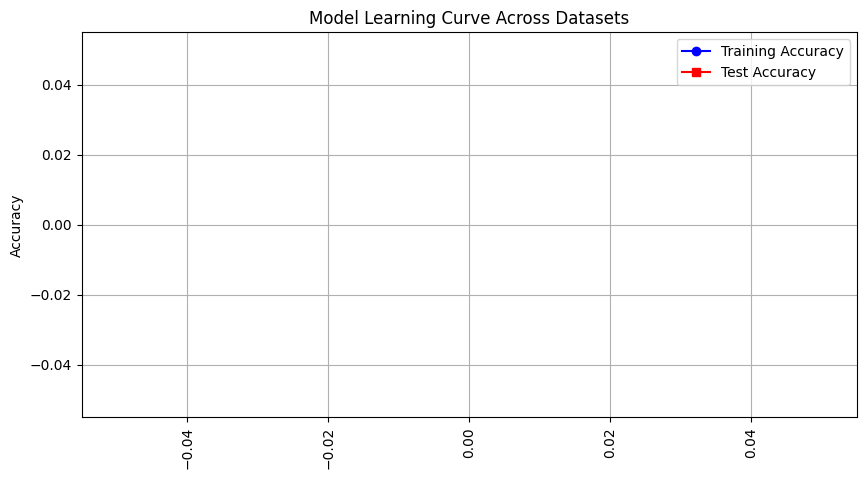

In [24]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train and evaluate models on each dataset
model_results = {}

for key, (X_train, X_test, y_train, y_test) in train_test_data.items():
    print(f"\n🚀 Training model for {key}...")

    # Train a Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)  # Predictions on training data
    y_test_pred = model.predict(X_test)  # Predictions on test data

    # Evaluate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    model_results[key] = (train_accuracy, test_accuracy)

    print(f"📊 Training Accuracy for {key}: {train_accuracy:.4f}")
    print(f"🎯 Test Accuracy for {key}: {test_accuracy:.4f}")

# Plot Learning Curve
plt.figure(figsize=(10, 5))

train_accs = [train_accuracy for train_accuracy, _ in model_results.values()]
test_accs = [test_accuracy for _, test_accuracy in model_results.values()]
datasets = list(model_results.keys())

plt.plot(datasets, train_accs, marker='o', label="Training Accuracy", color="blue")
plt.plot(datasets, test_accs, marker='s', label="Test Accuracy", color="red")

plt.xticks(rotation=90)
plt.ylabel("Accuracy")
plt.title("Model Learning Curve Across Datasets")
plt.legend()
plt.grid(True)
plt.show()

## Deep Learning

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Extract X_train and X_test from train_test_data
from sklearn.model_selection import train_test_split

# Ensure train_test_data is populated
if not train_test_data:
	# Use the first dataset from final_cleaned_dataframes as an example
	df_name, df = list(final_cleaned_dataframes.items())[0]
	existing_target_columns = [col for col in TARGET_COLUMNS if col in df.columns]

	if existing_target_columns:
		target_column = existing_target_columns[0]  # Use the first target column
		X = df.drop(columns=existing_target_columns)  # Features
		y = df[target_column]  # Target

		# Perform train-test split
		X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

		# Save the split data into train_test_data
		train_test_data[df_name] = (X_train, X_test, y_train, y_test)
	else:
		raise ValueError("No target columns found in the dataset. Ensure that the target columns are correctly defined.")

# Use the first dataset from train_test_data
key = list(train_test_data.keys())[0]
X_train, X_test, y_train, y_test = train_test_data[key]

# Dynamically identify text columns
text_columns = X_train.select_dtypes(include=["object"]).columns.tolist()
print(f"Text columns detected: {text_columns}")

# Ensure that X_train_encoded and X_test_encoded are DataFrames with the correct indices
X_train_encoded = pd.DataFrame(X_train, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test, index=X_test.index)

# Check if text_columns is not empty
if text_columns:
	# Combine text data from the specified columns
	text_data = X_train[text_columns].fillna("").apply(lambda x: " ".join(x), axis=1)

	# Initialize TfidfVectorizer
	vectorizer = TfidfVectorizer(max_features=500)  # Adjust max_features as needed

	# Fit and transform the training data
	X_train_text = pd.DataFrame(vectorizer.fit_transform(text_data).toarray(), index=X_train.index)

	# Transform the test data
	text_data_test = X_test[text_columns].fillna("").apply(lambda x: " ".join(x), axis=1)
	X_test_text = pd.DataFrame(vectorizer.transform(text_data_test).toarray(), index=X_test.index)
else:
	print("⚠️ No text columns detected. Skipping text feature processing.")
	# Create empty DataFrame for text features
	X_train_text = pd.DataFrame(index=X_train.index)
	X_test_text = pd.DataFrame(index=X_test.index)

# Ensure the indices of X_train_text and X_train_encoded match
X_train_text = X_train_text.reindex(X_train_encoded.index)
X_test_text = X_test_text.reindex(X_test_encoded.index)

# Combine the processed textual features with the existing numerical features
X_train_combined = np.hstack([X_train_encoded, X_train_text])
X_test_combined = np.hstack([X_test_encoded, X_test_text])

print(f"X_train_combined shape: {X_train_combined.shape}")
print(f"X_test_combined shape: {X_test_combined.shape}")


Text columns detected: []
⚠️ No text columns detected. Skipping text feature processing.
X_train_combined shape: (249, 8)
X_test_combined shape: (63, 8)


🔹 BERT or GPT → If text has complex relationships
🔹 LSTM or GRU → If text has sequential meaning
🔹 CNN for NLP → If local word patterns matte


🚀 Machine Learning Models
If your data is structured (numerical/tabular), traditional ML methods may work well: ✅ Decision Trees & Random Forest → Good for structured data, feature importance analysis
✅ Gradient Boosting (XGBoost, LightGBM, CatBoost) → Powerful for tabular data with boosting techniques
✅ Support Vector Machines (SVM) → Great for classification problems
✅ K-Nearest Neighbors (KNN) → Simple but useful for certain cases
✅ Logistic Regression → Best for binary classification
🔥 Deep Learning Architectures
If you have images, text, or highly complex patterns, DL might be a better choice: ✅ Convolutional Neural Networks (CNNs) → Best for image processing
✅ Recurrent Neural Networks (RNNs) & LSTMs → Designed for sequential data (like time series or language models)
✅ Transformers (BERT, GPT) → Cutting-edge for NLP and deep sequence understanding
✅ Autoencoders & GANs → Used for generative tasks or anomaly detection

